# Chapter 9 Plotting and Visualization

Making informative visualizations is one of the most important tasks in data analysis. It may serve the purpose for:

- Data exploration
- Getting ideas for building models
- Present findings

Let's start with matplotlib, a widely-used Python library for making plots.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Exercise: Exploring NYC Taxi Data
Please download train.zip from [Kaggle](https://www.kaggle.com/c/nyc-taxi-trip-duration/data)

In [2]:
# Extract files
import zipfile
# if not os.path.exists("Data"):
#     os.mkdir("Data")
with zipfile.ZipFile("train.zip", "r") as file:
    file.printdir()
    file.extractall("Data/nyctaxi")

File Name                                             Modified             Size
train.csv                                      2017-07-19 11:26:56    200589097


In [3]:
taxidata = pd.read_csv("Data/nyctaxi/train.csv", delimiter=",")

In [4]:
taxidata.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
print("Shape:", taxidata.shape)

Shape: (1458644, 11)


In [6]:
print("Feature names:", ", ".join(taxidata.columns))

Feature names: id, vendor_id, pickup_datetime, dropoff_datetime, passenger_count, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, store_and_fwd_flag, trip_duration


In [7]:
print("Data types:", taxidata.dtypes)

Data types: id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


In [8]:
# Change the data type of datetime columns
taxidata['pickup_datetime'] = taxidata['pickup_datetime'].astype(
    np.datetime64)

In [9]:
taxidata['dropoff_datetime'] = taxidata['dropoff_datetime'].astype(
                                np.datetime64)

In [10]:
print("Data Types:", taxidata.dtypes)

Data Types: id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object


In [11]:
# Missing values?
pd.isnull(taxidata).sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [12]:
# Look at statistics of numerical features
taxidata.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


## Visualization Task 1: Distribution of each column

**Vender IDs**

Text(0, 0.5, 'Frequency')

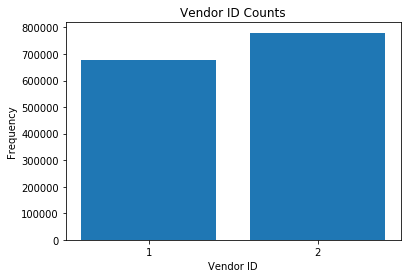

In [13]:
# plt.hist(taxidata['vendor_id'])
vendor_id_counts = taxidata['vendor_id'].value_counts()

#plt.bar(vendor_id_counts.index,
#       vendor_id_counts.values)
#plt.title("Vendor ID Counts")
#plt.xlabel("Vendor (1, 2)")
#plt.ylabel("Frequency")

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title("Vendor ID Counts")
ax.bar(vendor_id_counts.index,
      vendor_id_counts.values)
ax.set_xticks([1,2])
ax.set_xlabel("Vendor ID")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

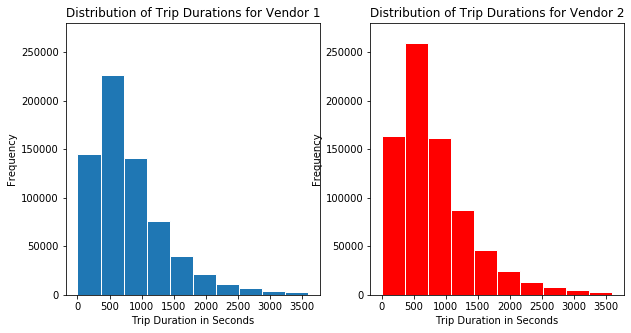

In [14]:
# Extract trips with Vendor ID 1.

id1_filter = taxidata["vendor_id"] == 1
taxidata_id1 = taxidata[id1_filter]

# Extract trips with Vendor ID 2.

id2_filter = taxidata["vendor_id"] == 2
taxidata_id2 = taxidata[id2_filter]

# Show the histogram of trip duration

fig = plt.figure(figsize = (10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.hist(taxidata_id1["trip_duration"], range = (0,3600), edgecolor = "w")
ax1.set_ylim(0,280000)
ax1.set_title("Distribution of Trip Durations for Vendor 1")
ax1.set_xlabel("Trip Duration in Seconds")
ax1.set_ylabel("Frequency")

ax2.hist(taxidata_id2["trip_duration"], range = (0,3600), edgecolor = "w", color = 'r')
ax2.set_ylim(0,280000)
ax2.set_title("Distribution of Trip Durations for Vendor 2")
ax2.set_xlabel("Trip Duration in Seconds")
ax2.set_ylabel("Frequency")

**Passenger count**

In [15]:
taxidata["passenger_count"].value_counts().sort_index()

0         60
1    1033540
2     210318
3      59896
4      28404
5      78088
6      48333
7          3
8          1
9          1
Name: passenger_count, dtype: int64

Text(0, 0.5, 'Frequency')

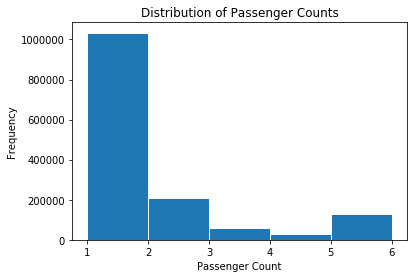

In [16]:
taxidata["passenger_count"].hist(bins = 5,
                                 range = (1,6),
                                edgecolor = "w",
                                grid = False)
plt.title("Distribution of Passenger Counts")
plt.xlabel("Passenger Count")
plt.ylabel("Frequency")

There are 60 trips with no passenger. We should remove those instaces from the data frame.

In [17]:
zero_pass_filter = taxidata["passenger_count"] > 0
taxidata = taxidata[zero_pass_filter]

In [18]:
#taxidata.to_csv("filtered_taxi.csv")

**Flag**

In [19]:
# What are the values in this column?
print(set(taxidata["store_and_fwd_flag"]))

# What are the frequencies?
print(taxidata["store_and_fwd_flag"].value_counts())

# compare the histogram of trip duration for Yes and No (HOMEWORK #1)


{'Y', 'N'}
N    1450542
Y       8042
Name: store_and_fwd_flag, dtype: int64


**Trip duration**

In [20]:
# Investigate outliers

# extract trips longer than 1 hour
# long_filter = taxidata["trip_duration"] > 36000
# taxidata[long_filter].head(5)

# extract trips shorter than 10 seconds
taxidata_short = taxidata[taxidata["trip_duration"] < 60]
taxidata_short.sample(10)
taxidata_short.shape

# remove trips whose duration si longer than 7200 or less than 60 
duration_filter = (taxidata["trip_duration"] >= 60) & (taxidata["trip_duration"] < 7200)
taxidata = taxidata[duration_filter]

In [21]:
taxidata.to_csv("filtered_taxi.csv")

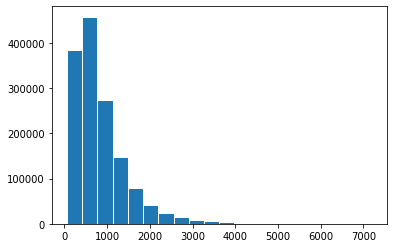

In [22]:
taxidata["trip_duration"].hist(bins = 20, grid = False, edgecolor = 'w')

In [23]:
taxidata.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


**Pick-up and drop-off datetime**

C:\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

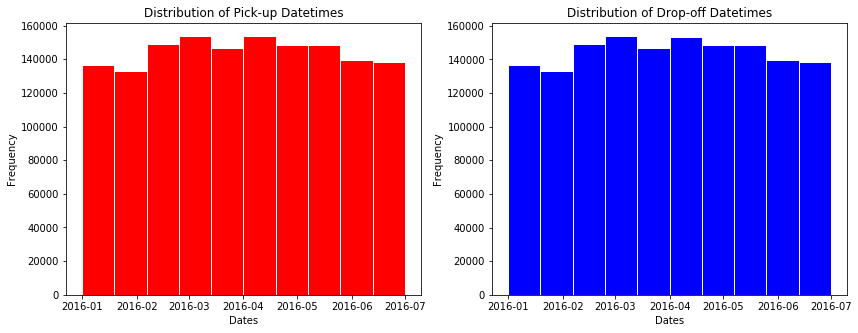

In [24]:
fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(1,2,1)
ax1.hist(taxidata["pickup_datetime"], edgecolor = "w", color = "r")
ax1.set_title("Distribution of Pick-up Datetimes")
ax1.set_xlabel("Dates")
ax1.set_ylabel("Frequency")
ax2 = fig.add_subplot(1,2,2)
ax2.hist(taxidata["dropoff_datetime"], edgecolor = 'w', color = "b")
ax2.set_title("Distribution of Drop-off Datetimes")
ax2.set_xlabel("Dates")
ax2.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

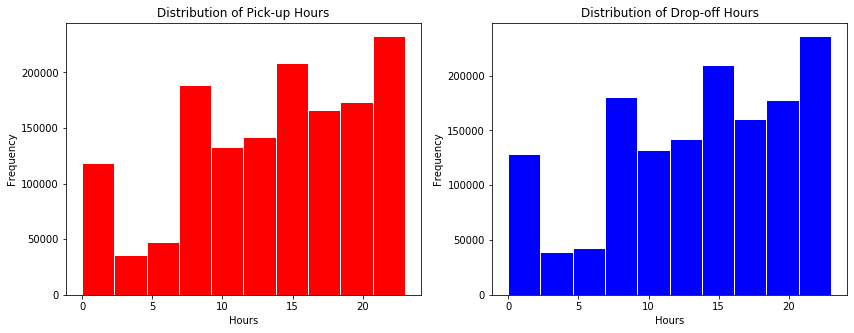

In [25]:
fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(1,2,1)
ax1.hist(taxidata["pickup_datetime"].dt.hour, edgecolor = "w", color = "r")
ax1.set_title("Distribution of Pick-up Hours")
ax1.set_xlabel("Hours")
ax1.set_ylabel("Frequency")
ax2 = fig.add_subplot(1,2,2)
ax2.hist(taxidata["dropoff_datetime"].dt.hour, edgecolor = 'w', color = "b")
ax2.set_title("Distribution of Drop-off Hours")
ax2.set_xlabel("Hours")
ax2.set_ylabel("Frequency")

**Longitudes and Latitudes**

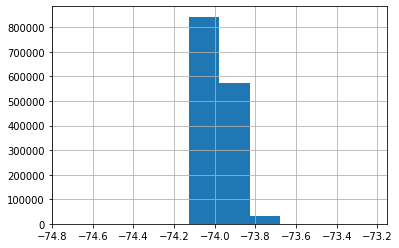

In [26]:
lower_bound = np.percentile(taxidata["pickup_longitude"], 0.001)
upper_bound = np.percentile(taxidata["pickup_longitude"], 99.999)
plong_filter = (taxidata["pickup_longitude"] > lower_bound) & (taxidata["pickup_longitude"] < upper_bound)
taxidata["pickup_longitude"][plong_filter].hist()
taxidata = taxidata[plong_filter]

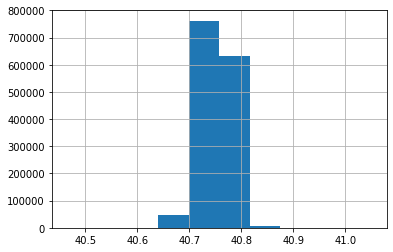

In [27]:
lower_bound = np.percentile(taxidata["pickup_latitude"], 0.001)
upper_bound = np.percentile(taxidata["pickup_latitude"], 99.999)
plat_filter = (taxidata["pickup_latitude"] > lower_bound) & (taxidata["pickup_latitude"] < upper_bound)
taxidata["pickup_latitude"][plat_filter].hist()
taxidata = taxidata[plat_filter]

In [28]:
# lower_bound = np.percentile(taxidata["dropoff_longitude"], 0.001)
# upper_bound = np.percentile(taxidata["dropoff_longitude"], 99.999)
# dlong_filter = (taxidata["dropoff_longitude"] > lower_bound) & (taxidata["dropoff_longitude"] < upper_bound)
# taxidata["dropoff_longitude"][dlong_filter].hist()
# taxidata = taxidata[dlong_filter]

In [29]:
# lower_bound = np.percentile(taxidata["dropoff_latitude"], 0.001)
# upper_bound = np.percentile(taxidata["dropoff_latitude"], 99.999)
# dlat_filter = (taxidata["dropoff_latitude"] > lower_bound) & (taxidata["dropoff_latitude"] < upper_bound)
# taxidata["dropoff_latitude"][dlat_filter].hist()
# taxidata = taxidata[dlat_filter]

## Consistency Check
- Is dropoff_time always greater than pickup_time?
- Is the difference between dropoff_time and pickup_time equal to trip_duration?
- Is the difference between dropoff_time and pickup_time too large to be accurate?
- Is the difference between dropoff_time and pickup_time too small to be accurate?

In [30]:
# # Is dropoff_time always greater than pickup_time?


In [32]:
# Is the difference between dropoff_time and pickup_time equal to trip_duration?



In [33]:
# Is the difference between dropoff_time and pickup_time too large to be accurate?



In [34]:
# Is the difference between dropoff_time and pickup_time too small to be accurate?



## Visualization Task 2: Correlations between a feature and trip_duration

In [35]:
# passenger count vs. trip duration



In [36]:
# pickup location vs. trip duration



In [37]:
# dropoff location vs. trip duration



## Feature engineering
The raw data usually is not the best way to provide useful features for a specific task. Therefore it is a crucial ability for a data scientist to create more meaningful features from the dataset.

- Hour of the day
- Day of the week
- Aerial distance

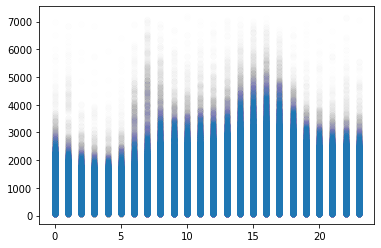

In [49]:
# hour of the day vs. trip duration
taxidata["pickup_hour"] = taxidata["pickup_datetime"].dt.hour
plt.scatter(taxidata["pickup_hour"], taxidata["trip_duration"], alpha = 0.005)

- long trips (>4000 sec) tend to happen between 3PM and 6PM
- during late night (2AM to 5AM), tris tend to be less than 2000 sec

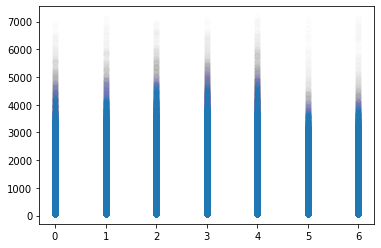

In [52]:
# day of the week vs. trip duration
taxidata["pickup_day"] = taxidata["pickup_datetime"].dt.dayofweek
plt.scatter(taxidata["pickup_day"], taxidata["trip_duration"], alpha = 0.005)

- There tends to be longer rides on Friday and there tends to be shorter rides on Saturday and Sunday

In [57]:
# Aerial distance vs. trip duration
taxidata["aerial_dist"] = np.sqrt( ((taxidata["pickup_longitude"] - taxidata["dropoff_longitude"])**2) - ((taxidata["pickup_latitude"] - taxidata["dropoff_latitude"])**2))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


(0, 0.5)

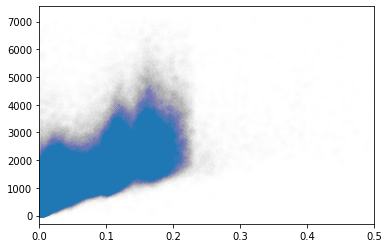

In [60]:
plt.scatter(taxidata["aerial_dist"], taxidata["trip_duration"], alpha = 0.005)
plt.xlim(0,0.5)

In [65]:
taxidata = taxidata.dropna()
print("Correlation Coefficient:", np.corrcoef(taxidata["aerial_dist"], taxidata["trip_duration"]))

Correlation Coefficient: [[1.         0.74316225]
 [0.74316225 1.        ]]


There is a strong correlation between aerial distance and trip duration

The trip duration is affected by many factors at the same time, and thus a good prediction method should account for all these factors. To further investigate the problem of predicting taxi trip duration, one would need to develop multi-variate statistical models (strong assumption on the distribution of data) or machine learning models (weak assumption on the distribution of data). If you are interested, look into the discussion in the [notebook section on Kaggle.com](https://www.kaggle.com/c/nyc-taxi-trip-duration/notebooks).

## Annotations 

In [41]:
# Load the bitcoin price data
import json
import requests
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
data = pd.DataFrame(json.loads(res.content)['Data'])
data = data.set_index('time')
data.index = pd.to_datetime(data.index, unit='s')
data.tail(3)

,close,high,low,open,volumefrom,volumeto
time,,,,,,
2019-10-14,8363.94,8414.24,8228.06,8296.34,17507.78,1.460155e+08
2019-10-15,8173.48,8439.31,8116.92,8363.94,24899.11,2.056746e+08
2019-10-16,7994.63,8193.41,7945.77,8173.48,30291.06,2.440451e+08


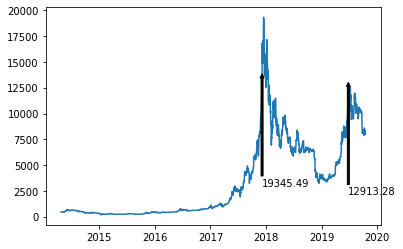

In [42]:
from datetime import datetime
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(data['close'])

peaks = [
    (datetime(2017, 12, 6), '19345.49'),
    (datetime(2019, 6, 26), '12913.28')
]

for date, label in peaks:
    ax.annotate(label,
                xy=(date, data.asof(date)['close']+100),
                xytext=(date, data.asof(date)['close']-10000),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment='left',
                verticalalignment='top')

In [43]:
# Add low points to the figure



In [44]:
# Add shapes



# Homework (not due yet)
The JFK international airport is located within longitude -73.82 to -73.78 and latitude 40.63 to 40.67. Extract all taxi trips who picked up passengers from this area.
1. For this sub-dataset only, visualize the correlation between the aerial distance and the trip duration.
2. For this sub-dataset only, visualize the drop-off location using dropoff_longitude and dropoff_latitude.
3. There was a snow storm on Jan 23, 2016. Is the distribution of trip_duration on that day different from the rest of the year?